In [1]:
import joblib
X_train_sm, X_val, X_test, y_train_sm, y_val, y_test = joblib.load('split_data.pkl')

In [2]:
print(f"Training set shape: {X_train_sm.shape, y_train_sm.shape}")
print(f"Validation set shape: {X_val.shape, y_val.shape}")
print(f"Test set shape: {X_test.shape, y_test.shape}")

Training set shape: ((12856, 6), (12856,))
Validation set shape: ((1414, 6), (1414,))
Test set shape: ((1414, 6), (1414,))


In [3]:
from sklearn.ensemble import RandomForestClassifier

#Train the initial Random Forest model
rf_model = RandomForestClassifier( n_jobs=-1, max_depth=5, n_estimators=100, oob_score=True,random_state=42)
rf_model.fit(X_train_sm, y_train_sm)


RandomForestClassifier(max_depth=5, n_jobs=-1, oob_score=True, random_state=42)

In [4]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, mean_squared_error

# Evaluate the model on the validation set
y_val_pred = rf_model.predict(X_val)
y_val_pred_proba = rf_model.predict_proba(X_val)[:, 1]

# Metrics for initial evaluation
accuracy = accuracy_score(y_val, y_val_pred)
precision = precision_score(y_val, y_val_pred)
recall = recall_score(y_val, y_val_pred)
f1 = f1_score(y_val, y_val_pred)
mse = mean_squared_error(y_val, y_val_pred)
conf_matrix = confusion_matrix(y_val, y_val_pred)

print(f"Initial model accuracy : {accuracy}")
print(f"Initial model precision : {precision}")
print(f"Initial model recall : {recall}")
print(f"Initial model F1-score: {f1}")
print(f"Initial model MSE on : {mse}")
print(f"Confusion Matrix:\n{conf_matrix}")


Initial model accuracy : 0.9222065063649222
Initial model precision : 0.2571428571428571
Initial model recall : 0.8571428571428571
Initial model F1-score: 0.3956043956043956
Initial model MSE on : 0.07779349363507779
Confusion Matrix:
[[1268  104]
 [   6   36]]


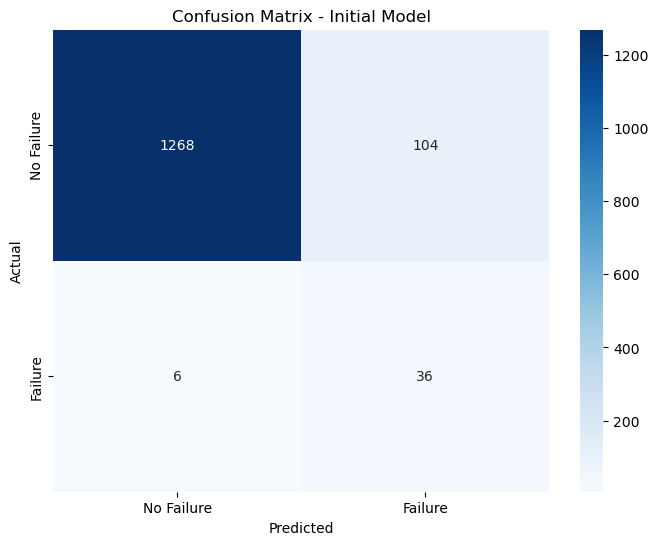

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt
# Plotting the confusion matrix as an image
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['No Failure', 'Failure'], yticklabels=['No Failure', 'Failure'])
plt.title('Confusion Matrix - Initial Model')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


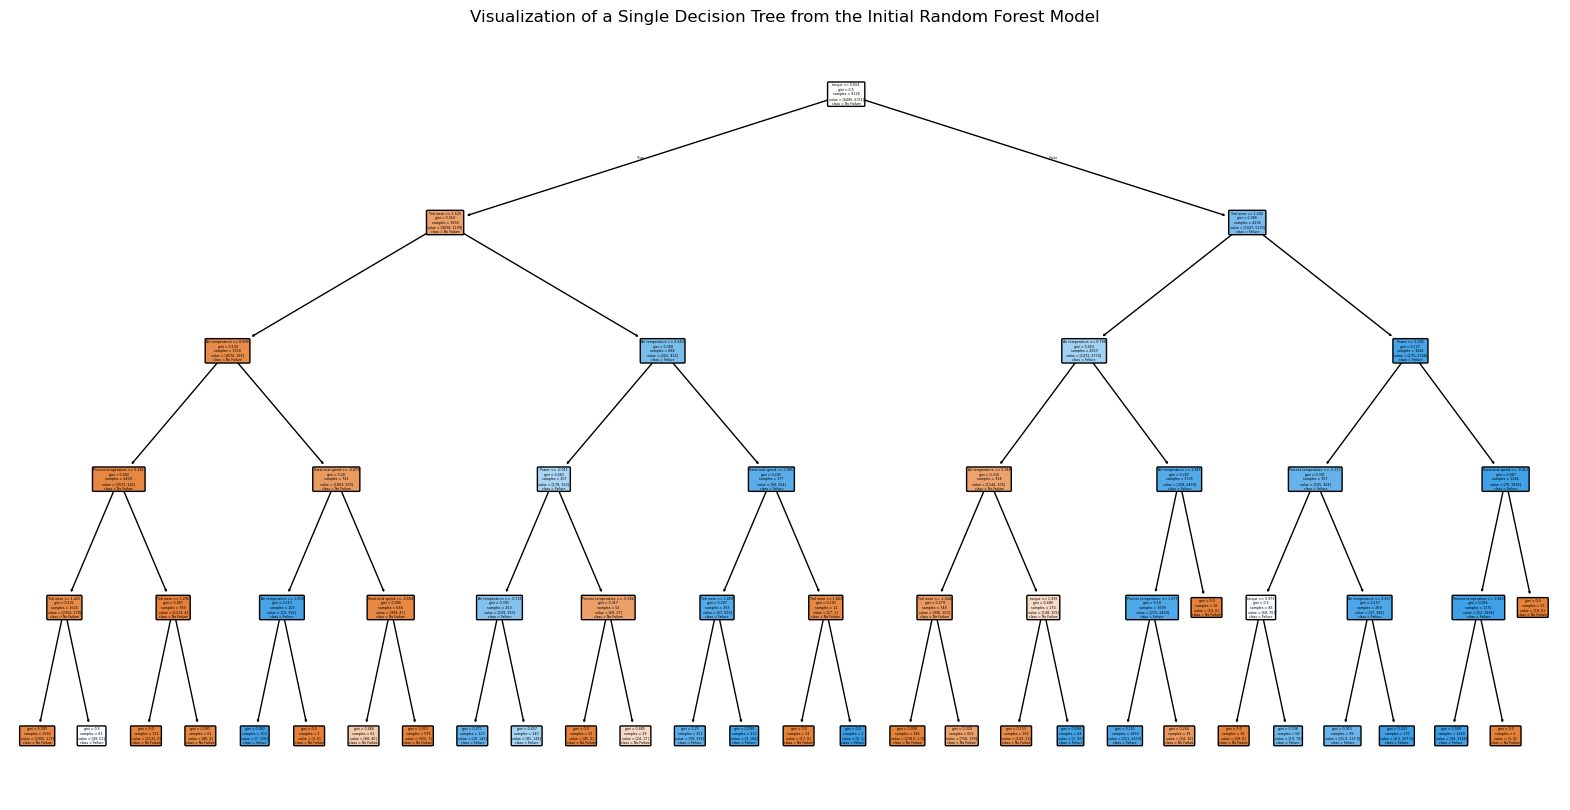

In [6]:
from sklearn.tree import plot_tree


# Plot a single tree from the Random Forest model
plt.figure(figsize=(20, 10))
plot_tree(rf_model.estimators_[0], filled=True, feature_names=X_train_sm.columns, class_names=['No Failure', 'Failure'], rounded=True)
plt.title("Visualization of a Single Decision Tree from the Initial Random Forest Model")
plt.show()


In [7]:
from sklearn.model_selection import GridSearchCV

# Defining parameters for tuning
param_grid = {
    'max_depth': [2,3,5,10,20],
    'min_samples_leaf': [5,10,20,50,100,200],
    'n_estimators': [10,25,30,50,100,200],
    'min_samples_split': [2, 5, 10]
}

# GridsearchCV with cross-Validation
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1, verbose=2)
grid_search.fit(X_train_sm, y_train_sm)


best_rf_model = grid_search.best_estimator_
joblib.dump(best_rf_model, 'rf_best_model.pkl')

# Printing parameters of best model
print(f"Best parameters: {grid_search.best_params_}")

Fitting 5 folds for each of 540 candidates, totalling 2700 fits


C:\Users\m2026\AppData\Roaming\Python\Python39\site-packages\numpy\ma\core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


Best parameters: {'max_depth': 20, 'min_samples_leaf': 5, 'min_samples_split': 2, 'n_estimators': 200}


In [8]:
#Evaluating the optimised model with validation data
y_val_pred_opt = best_rf_model.predict(X_val)
y_val_pred_proba_opt = best_rf_model.predict_proba(X_val)[:, 1]

accuracy_opt = accuracy_score(y_val, y_val_pred_opt)
precision_opt = precision_score(y_val, y_val_pred_opt)
recall_opt = recall_score(y_val, y_val_pred_opt)
f1_opt = f1_score(y_val, y_val_pred_opt)
mse_opt = mean_squared_error(y_val, y_val_pred_opt)
conf_matrix_opt = confusion_matrix(y_val, y_val_pred_opt)

print(f"Optimized model accuracy: {accuracy_opt}")
print(f"Optimized model precision: {precision_opt}")
print(f"Optimized model recall: {recall_opt}")
print(f"Optimized model F1-score: {f1_opt}")
print(f"Optimized model MSE: {mse_opt}")
print(f"Confusion Matrix:\n{conf_matrix_opt}")


Optimized model accuracy: 0.9611032531824611
Optimized model precision: 0.4155844155844156
Optimized model recall: 0.7619047619047619
Optimized model F1-score: 0.5378151260504201
Optimized model MSE: 0.038896746817538894
Confusion Matrix:
[[1327   45]
 [  10   32]]


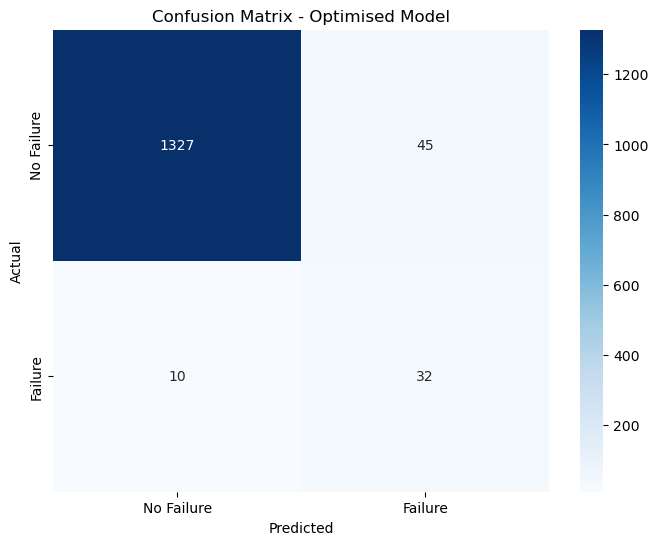

In [9]:

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_opt, annot=True, fmt='d', cmap='Blues', xticklabels=['No Failure', 'Failure'], yticklabels=['No Failure', 'Failure'])
plt.title('Confusion Matrix - Optimised Model')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [10]:
#Make predictions on the test dataset
y_test_pred = best_rf_model.predict(X_test)
test_accuracy = accuracy_score(y_test, y_test_pred)
print(f"Model Accuracy on Test Data: {test_accuracy:.4f}")

Model Accuracy on Test Data: 0.9767
